In [6]:
import sys
sys.path.append('../')

In [7]:
import pennylane as qml 
from pennylane import numpy as np 
import matplotlib.pyplot as plt 
from main import VarFourier
from main import RY_ansatz, Rot_ansatz, ZGR_ansatz

In [8]:
num_qubits = 6

In [9]:
def init_state():
    #qml.AmplitudeEmbedding(features=vecs[:,0], wires=range(num_qubits))
    pass 

In [10]:
num_layers = 8
#var_state_class = ZGR_ansatz(num_qubits, num_layers)
var_state_class = Rot_ansatz(num_qubits,num_layers)
var_state_class = RY_ansatz(num_qubits,num_layers)
var_state = var_state_class.construct_circuit
num_params = var_state_class.num_params


(<Figure size 5300x700 with 1 Axes>, <Axes: >)

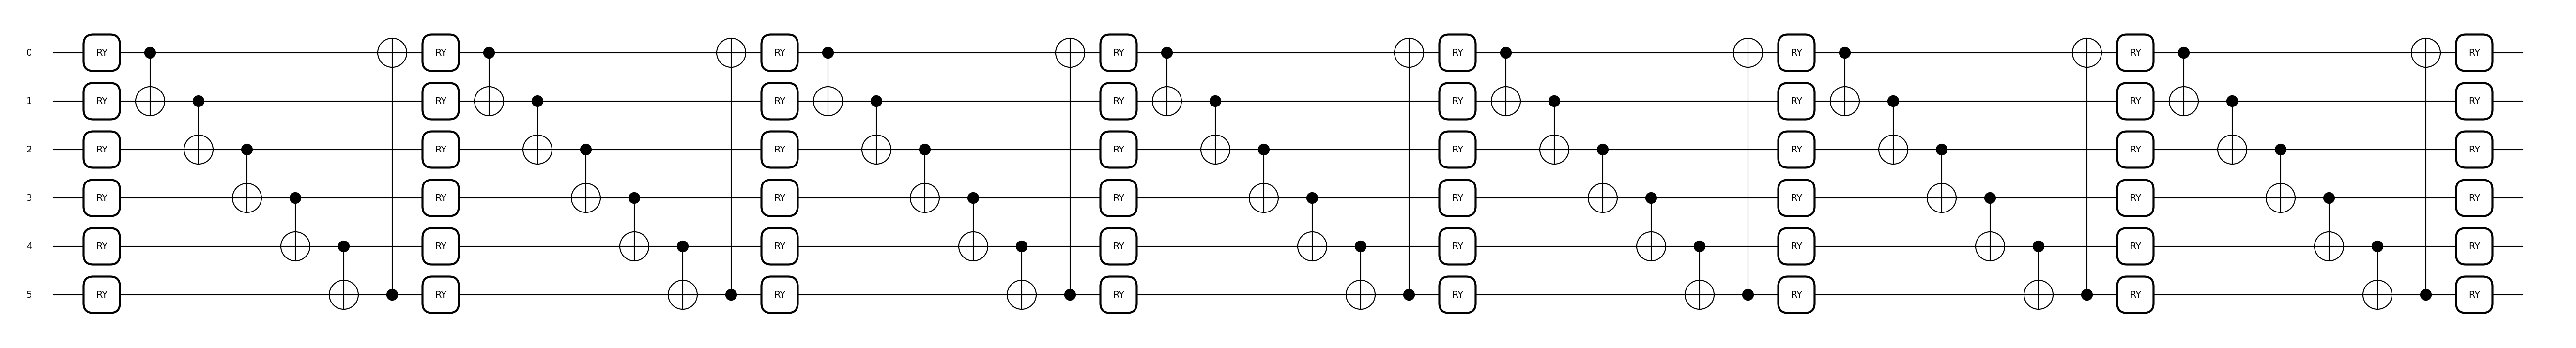

In [11]:
qml.draw_mpl( var_state )( num_params*[0] )

In [12]:
device = qml.device( "lightning.qubit", 
                    wires=num_qubits)

varqft = VarFourier( num_qubits,
                    lambda x : x**2/2,
                    lambda p : p**2/2,
                    device,
                    var_state  = var_state,
                    init_state = init_state,
                    #semi_classical=True
                    )

In [13]:
vals, vecs = varqft.energy_eigens()
val = vals[0]
vec = vecs[:,0]
val2 = vals[1]
vec2 = vecs[:,1] 
vals

array([  0.5       ,   1.5       ,   2.49999996,   3.50000062,
         4.49999279,   5.50005422,   6.49960958,   7.50176601,
         8.49104199,   9.52460606,  10.40897187,  11.65966708,
        12.19033234,  14.06633699,  14.27534256,  16.85007412,
        16.93707916,  20.03636287,  20.08118725,  23.62300147,
        23.64987422,  27.60475159,  27.62234873,  31.97770068,
        31.98977126,  36.73925908,  36.7476677 ,  41.88772206,
        41.89348811,  47.42194562,  47.42565755,  53.34114427,
        53.343145  ,  59.64476764,  59.64524396,  66.33145075,
        66.33242445,  73.40139218,  73.40383525,  80.85477928,
        80.85880311,  88.69137521,  88.6971966 ,  96.91096945,
        96.91894254, 105.51335235, 105.52402866, 114.49828231,
       114.51252013, 123.8654316 , 123.88460138, 133.61427884,
       133.64067271, 143.74386078, 143.78158468, 154.25210418,
       154.30927681, 165.13363443, 165.22886929, 176.37045492,
       176.557429  , 187.97084335, 188.2859242 , 201.39

In [15]:
params_init = np.random.randn( num_params )*0.01

params_ground, energies_ground = varqft.run( params_init, max_iterations=500, learning_rate=0.1 )

Step = 0,  Energy = 71.41439819
Step = 5,  Energy = 33.86412811
Step = 10,  Energy = 24.14175797
Step = 15,  Energy = 16.45207024
Step = 20,  Energy = 11.89874268
Step = 25,  Energy = 7.68330908
Step = 30,  Energy = 6.24633026
Step = 35,  Energy = 4.88745403
Step = 40,  Energy = 4.28973579
Step = 45,  Energy = 3.01623082
Step = 50,  Energy = 2.41513586
Step = 55,  Energy = 1.88062286
Step = 60,  Energy = 1.63430190
Step = 65,  Energy = 1.54948246
Step = 70,  Energy = 1.46210742
Step = 75,  Energy = 1.43572235
Step = 80,  Energy = 1.39154863
Step = 85,  Energy = 1.37220049
Step = 90,  Energy = 1.35815859
Step = 95,  Energy = 1.34625399
Step = 100,  Energy = 1.33390951
Step = 105,  Energy = 1.31871247
Step = 110,  Energy = 1.30500925
Step = 115,  Energy = 1.29007602
Step = 120,  Energy = 1.27456832
Step = 125,  Energy = 1.25719702
Step = 130,  Energy = 1.23797083
Step = 135,  Energy = 1.21618867
Step = 140,  Energy = 1.19144487
Step = 145,  Energy = 1.16279721
Step = 150,  Energy = 1.129

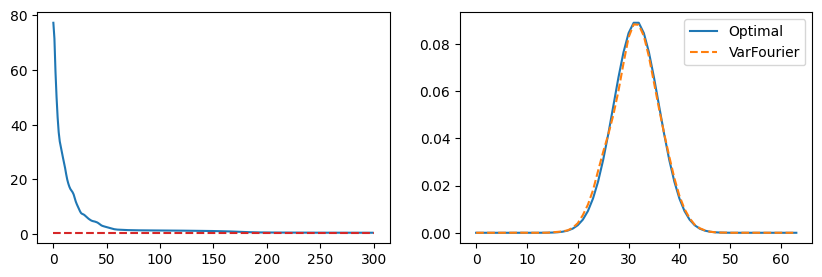

In [16]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_ground )
ax[0].hlines( val, 0, len(energies_ground), colors='tab:red', linestyles='--' ) 

ground_state = varqft.state( params_ground[-1] )

ax[1].plot( np.abs(vec)**2) 
ax[1].plot( np.abs(ground_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [17]:
abs(np.vdot( ground_state, vec ))**2

0.9984161049117029

In [18]:
params_ground[-1]

Array([ 4.8148349e-01, -1.2363018e-02,  1.4375231e-02, -6.2971555e-02,
        1.7255222e+00,  1.5703187e+00, -1.5897188e+00,  9.8596102e-01,
        4.8639695e-03,  1.4985912e-01, -1.3401196e+00, -1.3486279e-02,
        4.5207354e-01,  5.6156155e-02,  4.0146276e-01,  1.8453642e-03,
       -1.8759017e-01, -5.8863276e-01,  1.3666044e-01, -1.6069330e+00,
       -1.1340981e-02,  1.8574269e-01,  3.5357723e-01, -4.8441336e-02,
        1.5729653e+00,  3.5447571e-01, -4.5358269e-03, -2.5684216e+00,
        1.2691986e-03,  1.7161750e-03, -9.1660157e-02, -1.9366663e-02,
        1.6046388e-01, -1.3879016e-02,  3.4727526e-03,  1.5488764e+00,
       -8.1429964e-01,  1.3142738e+00,  1.8783486e-01,  7.4613458e-03,
       -1.7869659e-02, -1.1305582e-02,  1.5834125e+00, -2.4624497e-02,
       -3.2928882e+00,  9.5147669e-02,  2.7564023e-02,  1.0513465e+00],      dtype=float32)

In [19]:
varqft = VarFourier( num_qubits, 
                    lambda x : x**2/2, 
                    lambda p : p**2/2, 
                    device, 
                    var_state  = var_state, 
                    init_state = init_state, 
                    orthovals  = 25, 
                    orthoparams= np.copy(params_ground[-1]) 
                    ) 

In [21]:
params_init = np.random.randn( num_params )

params_excited, energies_excited = varqft.run( params_init , max_iterations=500, learning_rate= 0.2)

Step = 0,  Energy = 36.34834290
Step = 5,  Energy = 19.84937859
Step = 10,  Energy = 18.86298943
Step = 15,  Energy = 15.72622681
Step = 20,  Energy = 12.56384182
Step = 25,  Energy = 9.97242546
Step = 30,  Energy = 7.80568790
Step = 35,  Energy = 7.63276434
Step = 40,  Energy = 7.28483868
Step = 45,  Energy = 7.44590998
Step = 50,  Energy = 6.98639059
Step = 55,  Energy = 6.74517012
Step = 60,  Energy = 7.02256966
Step = 65,  Energy = 7.18545341
Step = 70,  Energy = 7.32840252
Step = 75,  Energy = 7.30797148
Step = 80,  Energy = 7.13467836
Step = 85,  Energy = 7.00825596
Step = 90,  Energy = 6.90602779
Step = 95,  Energy = 6.64369774
Step = 100,  Energy = 6.38423443
Step = 105,  Energy = 6.22114086
Step = 110,  Energy = 6.05421543
Step = 115,  Energy = 5.93807220
Step = 120,  Energy = 5.81804180
Step = 125,  Energy = 5.62225246
Step = 130,  Energy = 5.38173103
Step = 135,  Energy = 5.10756874
Step = 140,  Energy = 4.81848383
Step = 145,  Energy = 4.48864031
Step = 150,  Energy = 4.141

In [22]:
val

0.4999999999633249

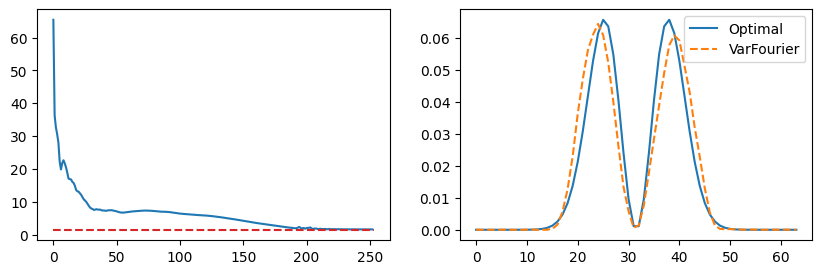

In [23]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_excited )
ax[0].hlines( val2, 0, len(energies_excited), colors='tab:red', linestyles='--' ) 

excited_state = varqft.state( params_excited[-1] )

ax[1].plot( np.abs(vec2)**2) 
ax[1].plot( np.abs(excited_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [24]:
abs(np.vdot( ground_state, vec ))**2

0.9984161049117029

In [25]:
abs(np.vdot( ground_state, excited_state ))**2 

4.3386398394101855e-06

In [26]:
abs(np.vdot( excited_state, vec2 ))**2

0.976457035249967